In [1]:
# READ DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import random

# Import Data

In [2]:
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Mluthfialgifari/Tugas-Akhir-Skripsi/refs/heads/main/Data/Data%20TMA%20(Jan%202022%20-%20Mei%202025).csv')
data = data.loc[:, ['Daily_Period', 'TMA_Daily']]
data = data.iloc[:1215].reset_index(drop=True)

print(data.head())
print(data.tail())

  Daily_Period  TMA_Daily
0   01/01/2022       10.0
1   02/01/2022       10.0
2   03/01/2022       10.0
3   04/01/2022       10.0
4   05/01/2022       12.5
     Daily_Period  TMA_Daily
1210   25/04/2025  20.000000
1211   26/04/2025  20.000000
1212   27/04/2025  20.000000
1213   28/04/2025  21.666667
1214   29/04/2025  20.000000


# Skenario Sliding Window Validation

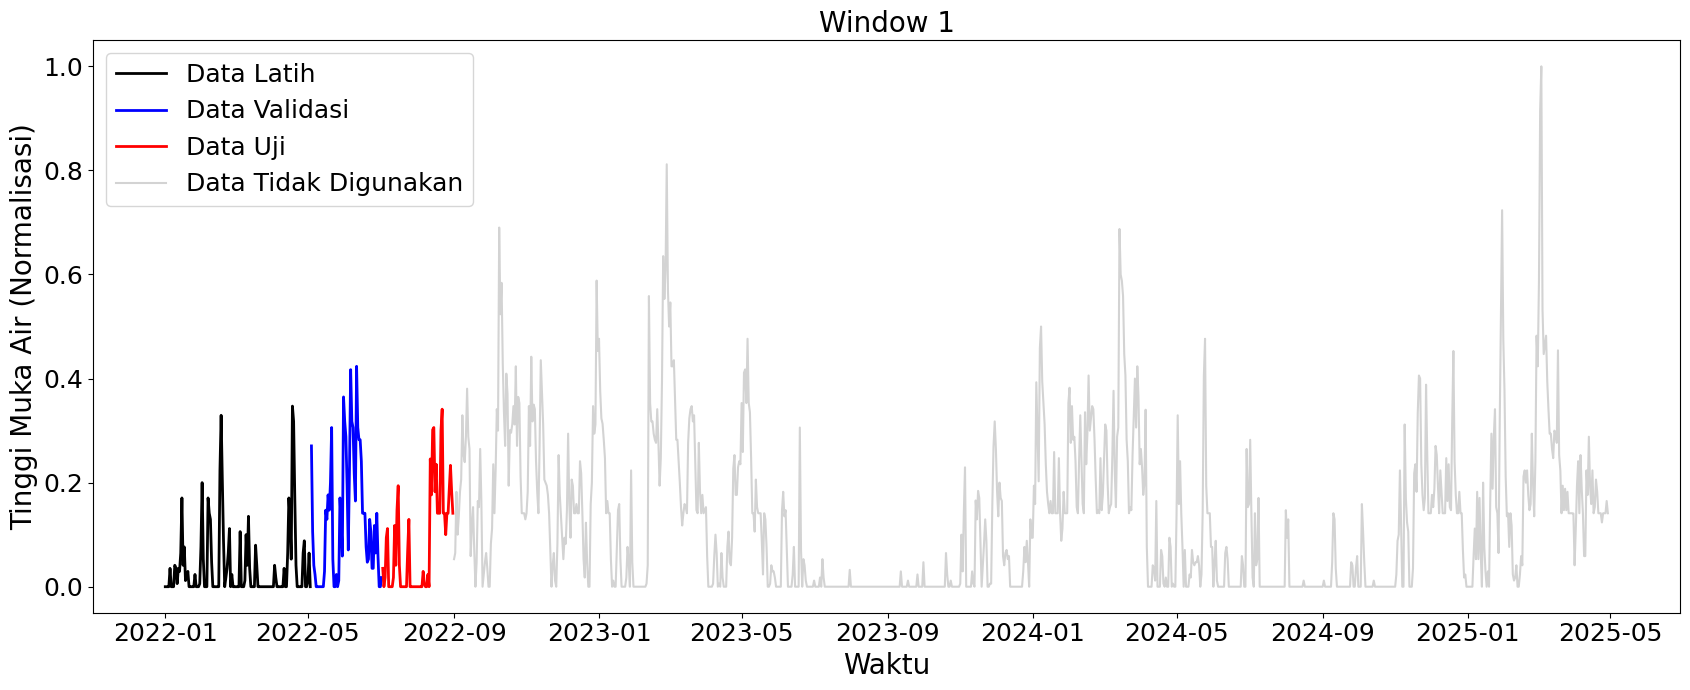

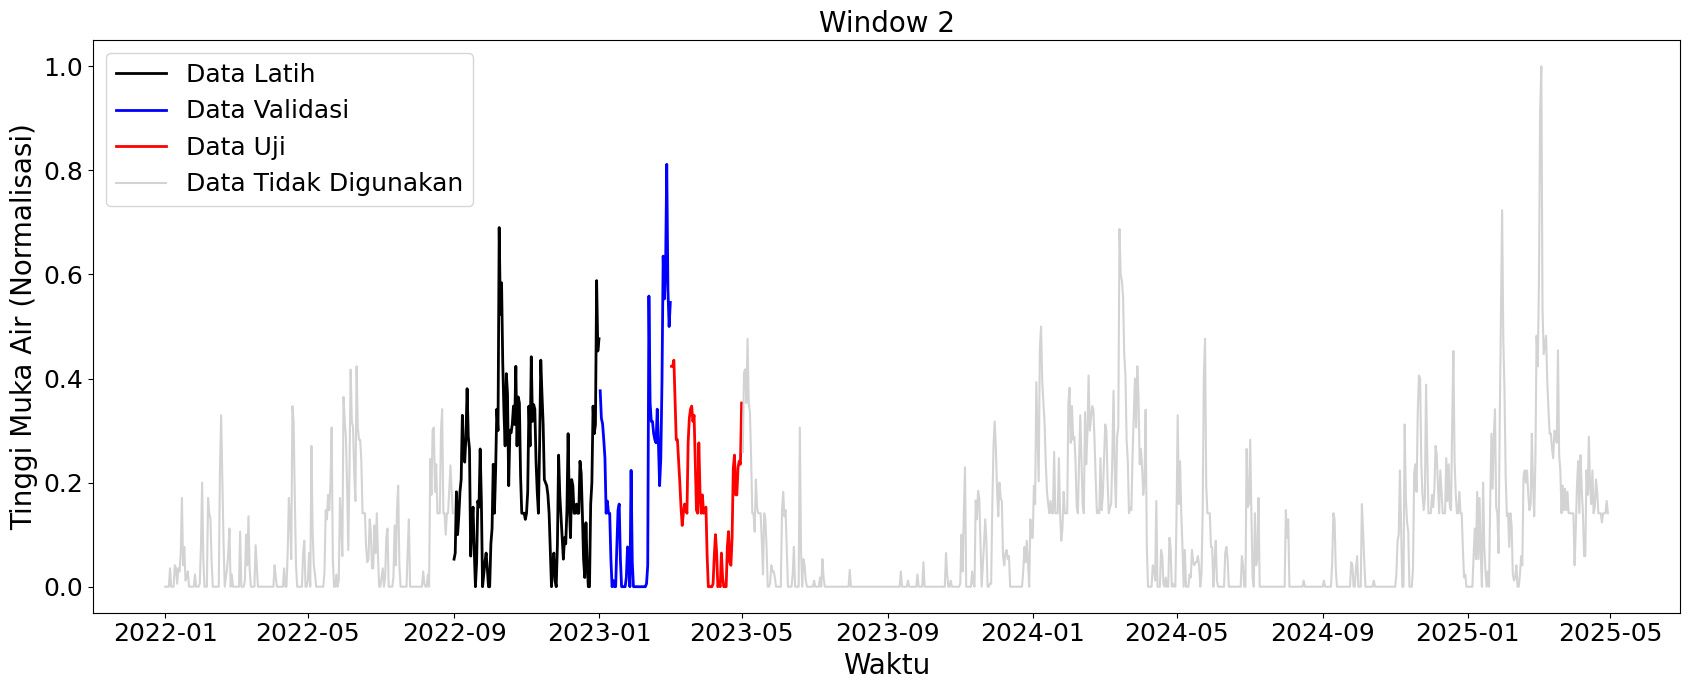

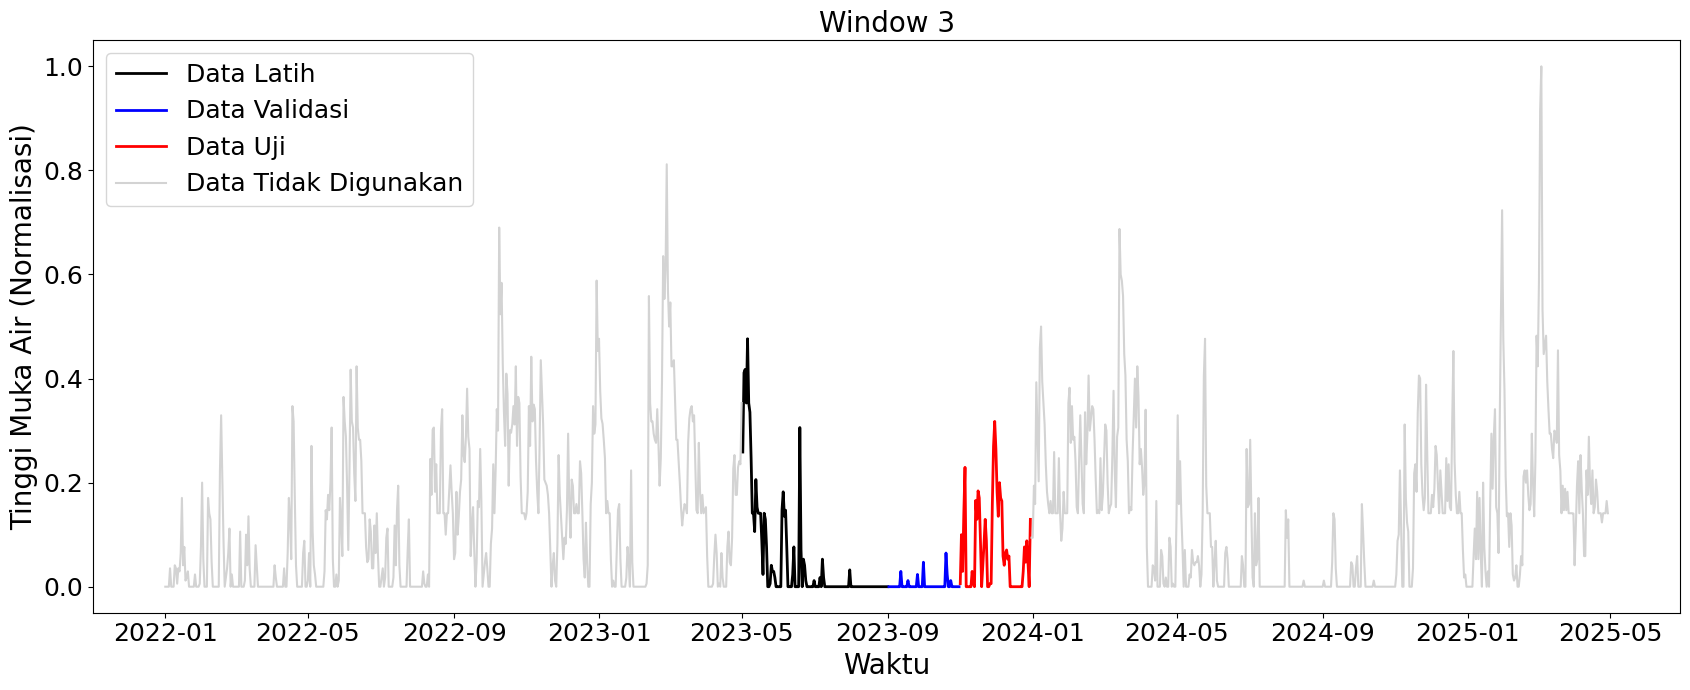

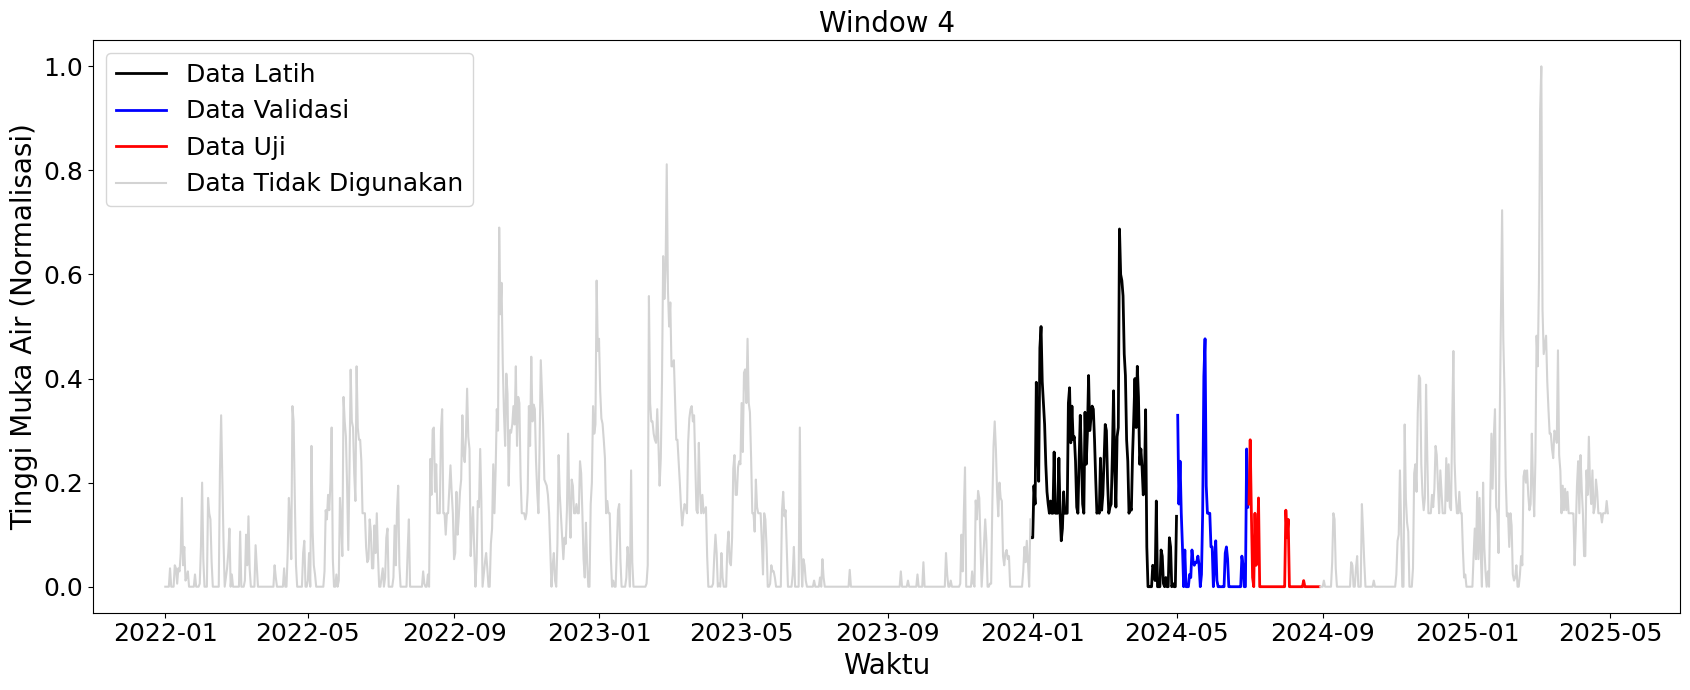

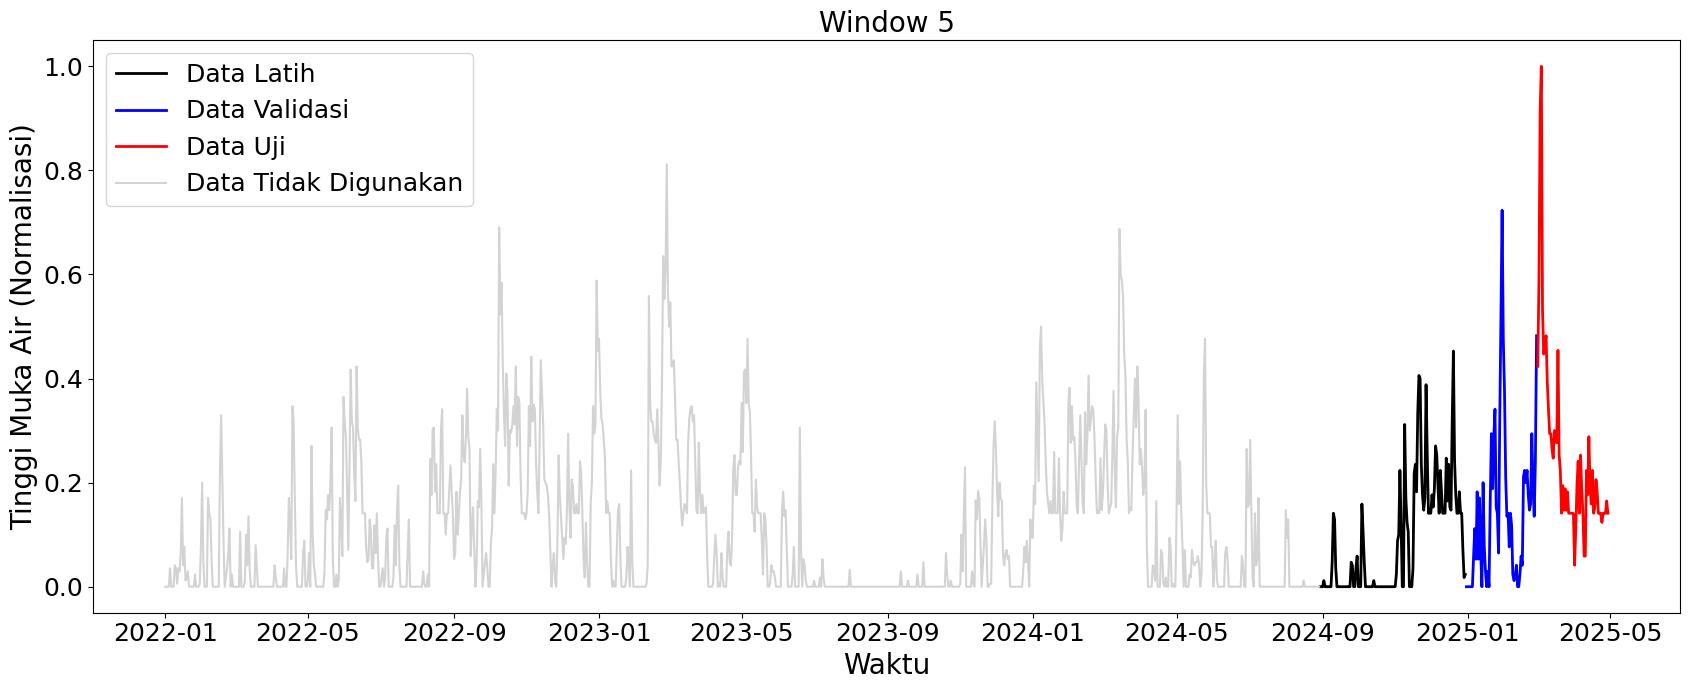

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data['Daily_Period'] = pd.to_datetime(data['Daily_Period'], dayfirst=True)
data.set_index('Daily_Period', inplace=True)

# Normalisasi data untuk keperluan visualisasi
data_norm = (data['TMA_Daily'] - data['TMA_Daily'].min()) / (data['TMA_Daily'].max() - data['TMA_Daily'].min())

# Parameter Sliding Window
n_windows = 5
window_size = 243
train_size = 123
val_size = 60
test_size = 60
shift = 243

# STEP 2: Visualisasi per Fold
for i in range(n_windows):
    start = i * shift
    end = start + window_size

    # Ambil subset window
    data_window = data_norm.iloc[start:end]
    train = data_window.iloc[:train_size]
    val = data_window.iloc[train_size:train_size+val_size]
    test = data_window.iloc[train_size+val_size:train_size+val_size+test_size]

    # Buat seluruh data abu-abu kecuali window aktif
    unused = data_norm.copy()
    unused.iloc[start: start + train_size + val_size + test_size] = np.nan

    # Plot per window
    plt.figure(figsize=(17, 7))
    plt.plot(train.index, train, color='black', lw=2, label='Data Latih')
    plt.plot(val.index, val, color='blue', lw=2, label='Data Validasi')
    plt.plot(test.index, test, color='red', lw=2, label='Data Uji')
    plt.plot(unused.index, unused, color='lightgray', label='Data Tidak Digunakan')

    plt.title(f'Window {i+1}', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Waktu', fontsize=20)
    plt.ylabel('Tinggi Muka Air (Normalisasi)', fontsize=20)
    plt.legend(loc='upper left', fontsize=18)
    plt.tight_layout()
    plt.show()

# Skenario Expanding Window Validation

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/Mluthfialgifari/Tugas-Akhir-Skripsi/refs/heads/main/Data/Data%20TMA%20(Jan%202022%20-%20Mei%202025).csv')
data = data.loc[:, ['Daily_Period', 'TMA_Daily']]
data = data.iloc[:1215].reset_index(drop=True)

print(data.head())
print(data.tail())

  Daily_Period  TMA_Daily
0   01/01/2022       10.0
1   02/01/2022       10.0
2   03/01/2022       10.0
3   04/01/2022       10.0
4   05/01/2022       12.5
     Daily_Period  TMA_Daily
1210   25/04/2025  20.000000
1211   26/04/2025  20.000000
1212   27/04/2025  20.000000
1213   28/04/2025  21.666667
1214   29/04/2025  20.000000


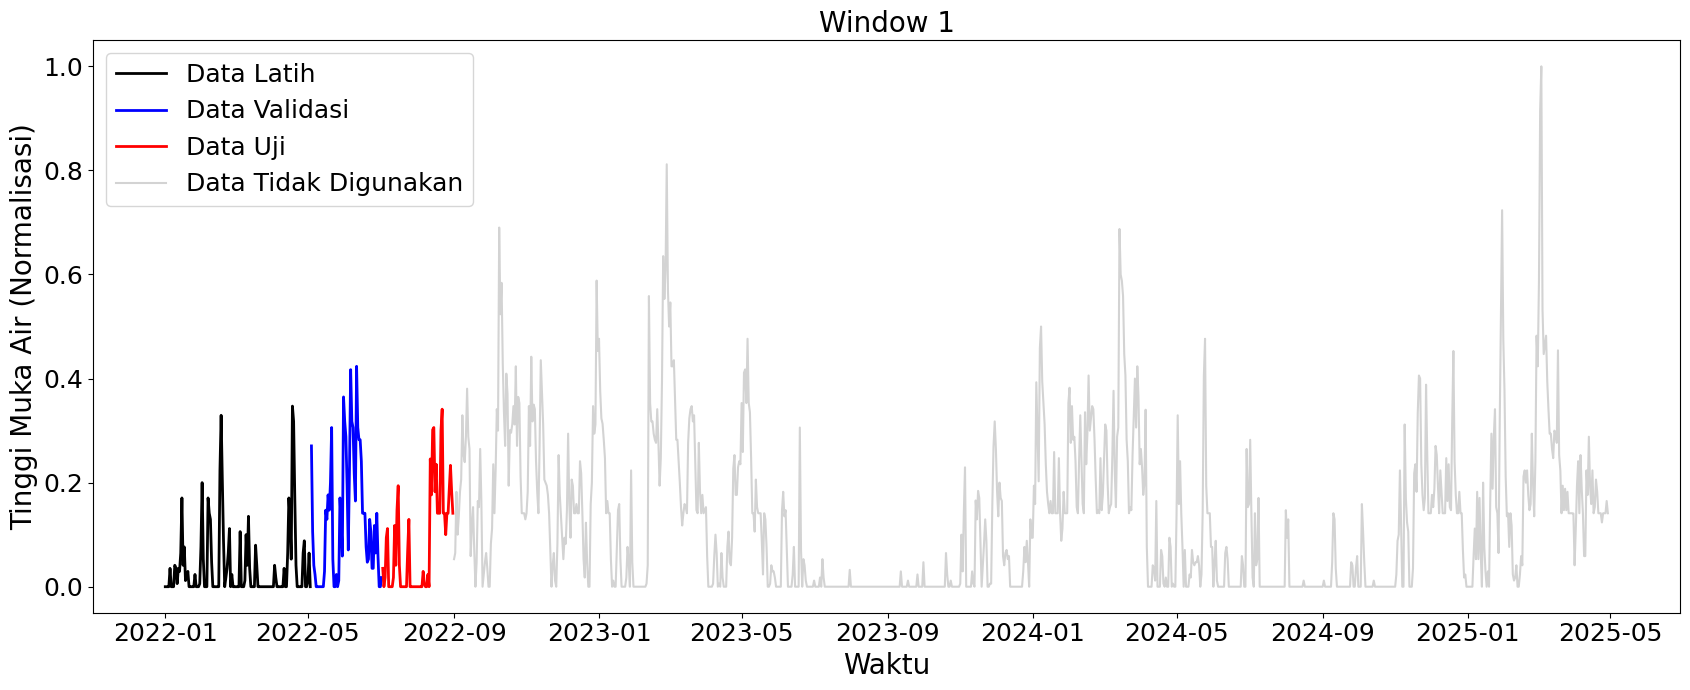

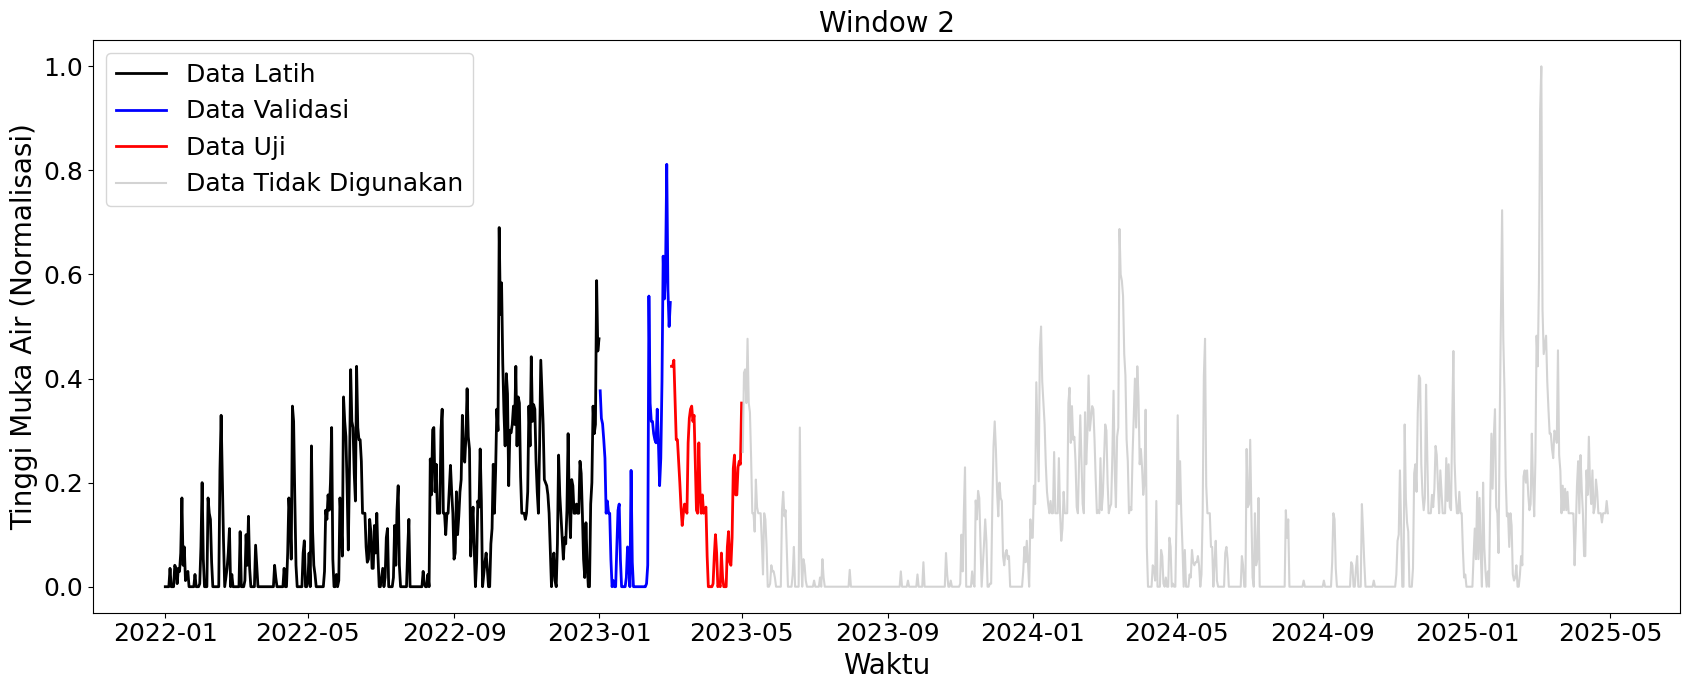

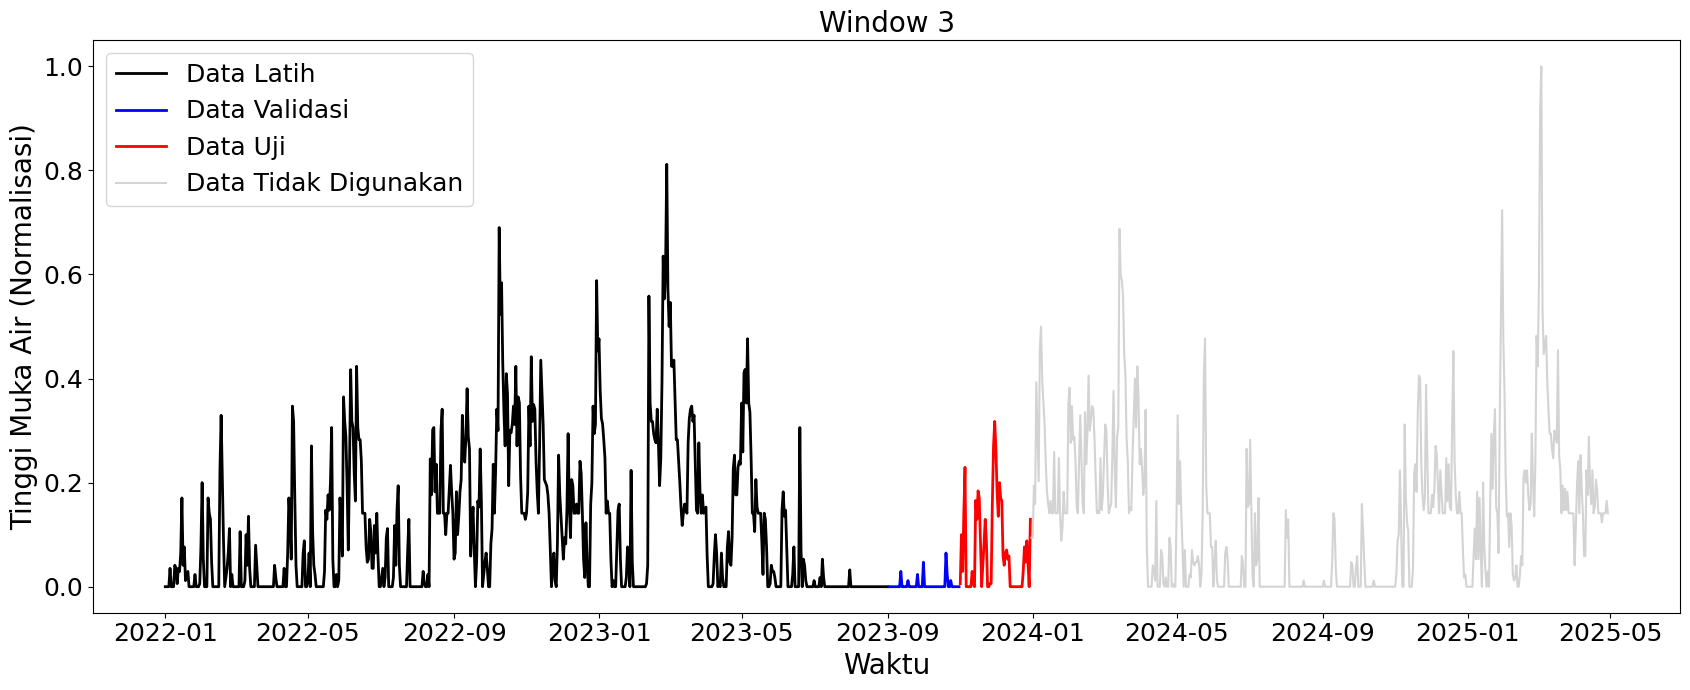

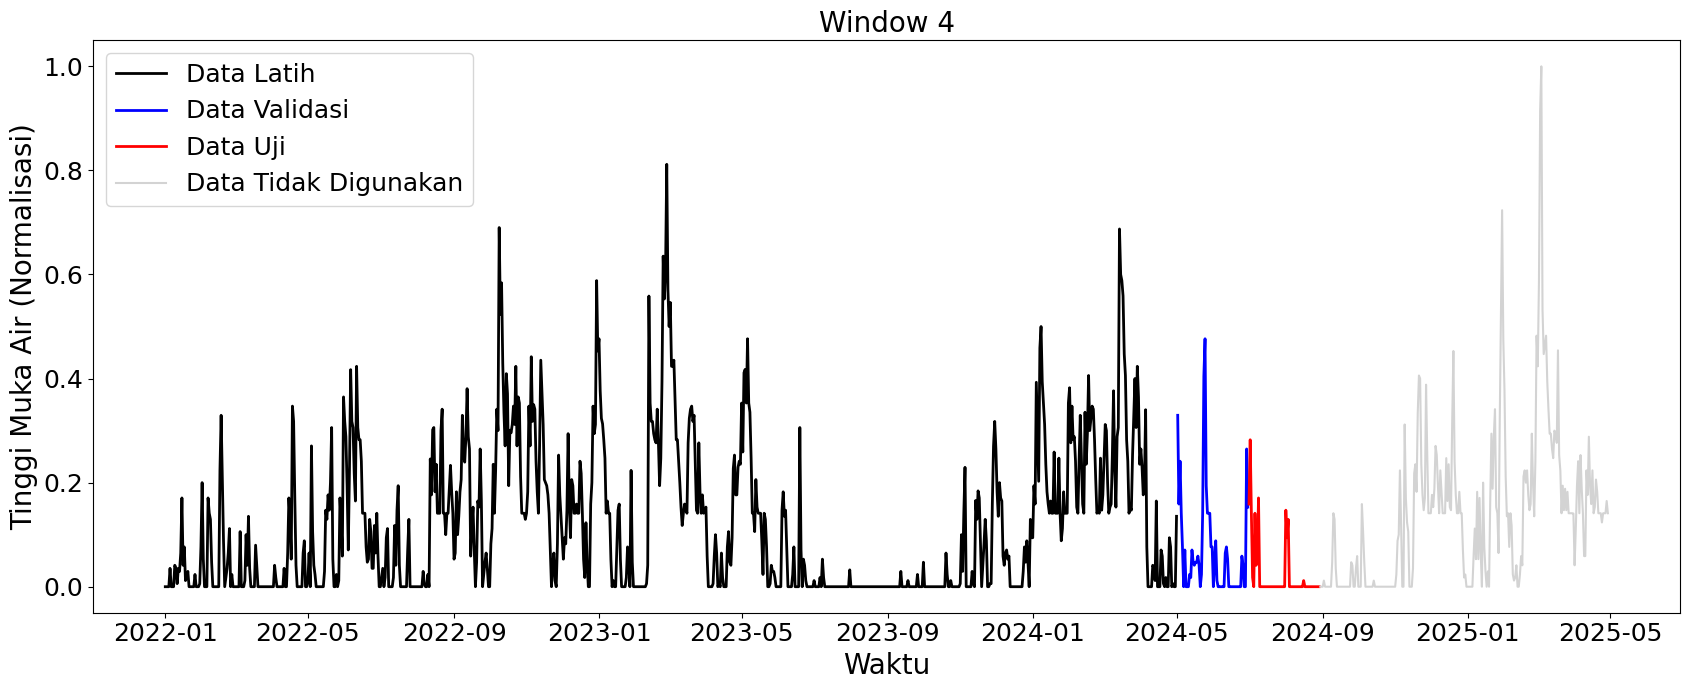

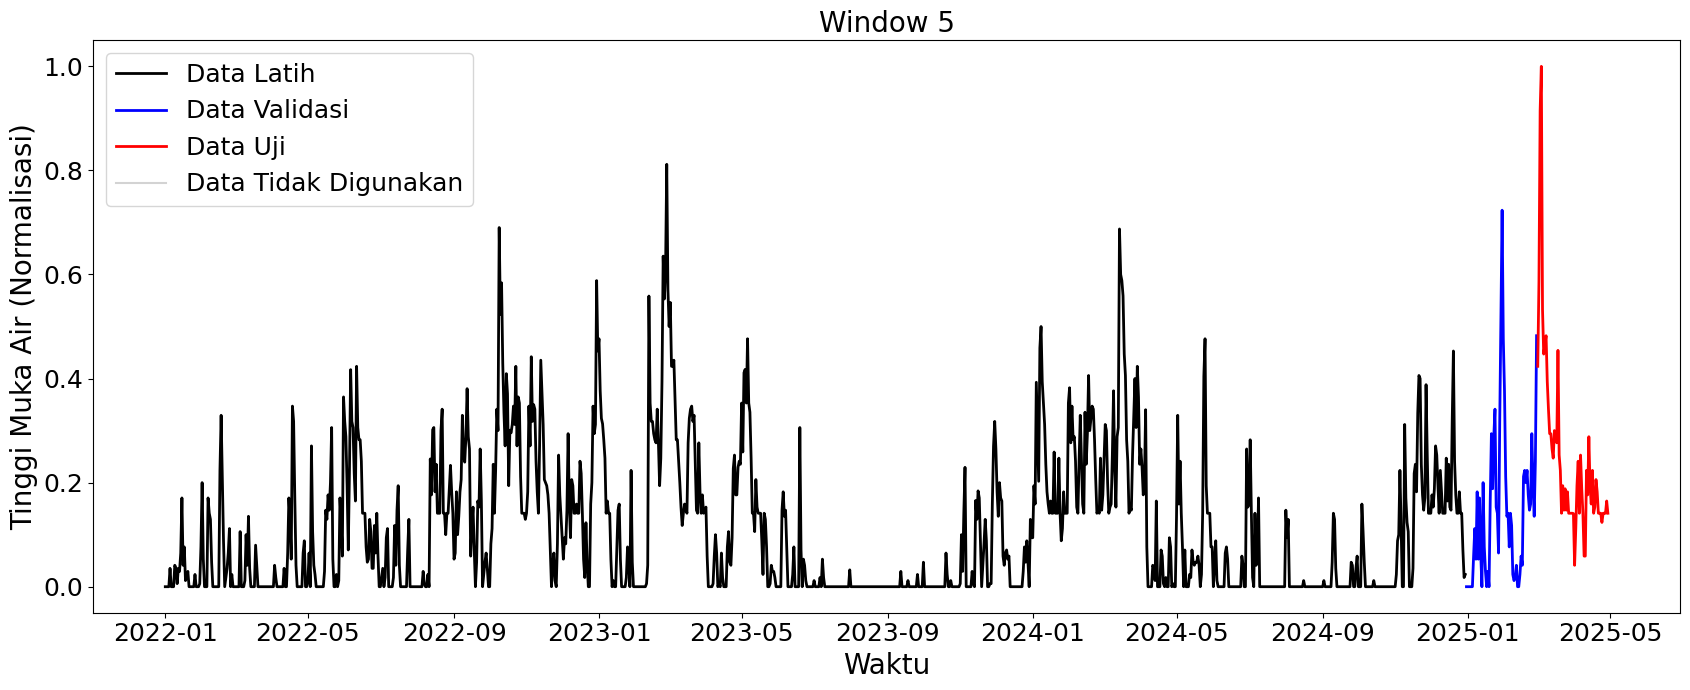

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data['Daily_Period'] = pd.to_datetime(data['Daily_Period'], dayfirst=True)
data.set_index('Daily_Period', inplace=True)

# Normalisasi
data_norm = (data['TMA_Daily'] - data['TMA_Daily'].min()) / (data['TMA_Daily'].max() - data['TMA_Daily'].min())

# Parameter
n_windows = 5
shift = 243
train_base = 123
val_size = 60
test_size = 60

for i in range(n_windows):
    # Hitung panjang data latih yang terus bertambah
    train_end = shift * i + train_base
    val_end = train_end + val_size
    test_end = val_end + test_size

    if test_end > len(data_norm):  # Hindari overflow
        break

    # Potongan data
    train = data_norm.iloc[:train_end]
    val = data_norm.iloc[train_end:val_end]
    test = data_norm.iloc[val_end:test_end]

    # Data tidak digunakan
    unused = data_norm.copy()
    unused.iloc[:test_end] = np.nan

    # Plot
    plt.figure(figsize=(17, 7))
    plt.plot(train.index, train, color='black', lw=2, label='Data Latih')
    plt.plot(val.index, val, color='blue', lw=2, label='Data Validasi')
    plt.plot(test.index, test, color='red', lw=2, label='Data Uji')
    plt.plot(unused.index, unused, color='lightgray', label='Data Tidak Digunakan')

    plt.title(f'Window {i+1}', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Waktu', fontsize=20)
    plt.ylabel('Tinggi Muka Air (Normalisasi)', fontsize=20)
    plt.legend(loc='upper left', fontsize=18)
    plt.tight_layout()
    plt.show()